# <center> **NLP analysis of jokes dataset**

## Table of Contents

1. **[Functions](#1)**
2. **[Preprocessing](#3)**
	* [Cleaning](#sub-heading2)

# **Imports**

In [1]:
!pip install unidecode
!pip install emoji
!pip install word2number
!pip install contractions
!pip3 install spacy
!python3 -m spacy download en_core_web_sm
!python3 -m nltk.downloader stopwords
!pip install pyspellchecker
!pip install iplot

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.



Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.
"python3" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"python3" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 
import warnings
warnings.simplefilter('ignore')

from scipy.stats import norm

# from google.colab import drive
import os
import string
import emoji

import plotly as py
import numpy as np
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter

import unidecode
from word2number import w2n
import contractions

import spacy

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from spellchecker import SpellChecker
# from wordcloud import WordCloud

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc='PROGRESS>>>')

# from google_drive_downloader import GoogleDriveDownloader as gdd
# from IPython.core.display import display, HTML

from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, StratifiedKFold, KFold, cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import label_binarize, StandardScaler

from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm
# import gensim
# import gensim.downloader as api
# from gensim.models import Word2Vec
# import gensim.downloader as gensim_api




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Полина\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Полина\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Полина\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
from torch.nn.utils.rnn import pad_sequence
from functools import partial
import torch      
import torch.nn as nn
from torch.utils.data import TensorDataset, ConcatDataset, DataLoader, random_split, Dataset
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim

In [6]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objs as go

In [7]:
!pip install bs4 

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
from bs4 import BeautifulSoup

In [9]:
data = pd.read_csv(r'C:\NLP_humor\data\jokes_dataset.csv', 
                 sep=',', 
                 encoding='utf-8').set_index('id')
# work with copy
df = data.copy(deep=True)

# **Functions**

In [10]:
def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

**Removal of html tags**

In [11]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

**Removal of whitespaces**

In [12]:
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

**Removal of accented characters**

In [13]:
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

**Removal of shortened words**

In [14]:
def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text

**Removal of urls**

In [15]:
def find_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.findall(text)

In [16]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

**Removal of Frequent words**

In [17]:
def count_words(text, top=10):
    cnt = Counter()
    for text in text.values:
        for word in text.split():
            cnt[word] += 1
          
    return cnt.most_common(top)

In [18]:
# FREQWORDS = set([w for (w, wc) in count_words(data['joke'], 10)])
# FREQWORDS

# n_rare_words = 10
# RAREWORDS = set([w for (w, wc) in count_words(data['joke'][:-n_rare_words-1:-1])])
# RAREWORDS

In [19]:
def remove_freqwords(text):
    """remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

**Removal of Rare words**

In [20]:
def remove_rarewords(text):
    """remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

**Removal of stopwords**


In [21]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

**Convert chat words**

In [22]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [23]:
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

**Convertion of emoticons**

In [24]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [25]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

**Removal of Punctuations**

In [26]:
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

**Removal of numbers**

In [27]:
def remove_numbers(input):
    input_str = re.sub(r'\d+', "", input)
    return input_str

**Find emoji**

In [28]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

**Stemming**

In [29]:
stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text])

# **Preprocessing**

In [30]:
df.shape

(194616, 3)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194616 entries, 5tz52q to 1a801u
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   body    190507 non-null  object 
 1   score   194553 non-null  float64
 2   title   194553 non-null  object 
dtypes: float64(1), object(2)
memory usage: 5.9+ MB


## **Check missing data**

In [32]:
df.isnull().sum()

body     4109
score      63
title      63
dtype: int64

In [33]:
df[df['body'].isna() == True]

,body,score,title
id,,,
5tr0co,NaN,4.0,Obese people are a very large portion of the p...
4zcsif,NaN,2.0,"A priest, a bishop, and a pontiff are all in a..."
4toft6,NaN,0.0,Plagiarism is cheating. If mrs trump cheated o...
4rlhug,NaN,0.0,Marriage is like childhood...
4rlf8f,NaN,0.0,The worst excuse I have ever came up with.
...,...,...,...
1avalc,NaN,0.0,a dyslexic man walks into a bra
1autf7,NaN,22.0,I tried searching on Google for 'Lost Medieval...
1ajoog,NaN,0.0,591


There are not a lot of NaNs in 2 columns (score, title), we can just drop them.

In [34]:
df.dropna(subset=['title', 'score'], inplace=True)

So, now we have full jokes in body, not in title.

In [38]:
df.isna().sum()

body     4109
score       0
title       0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

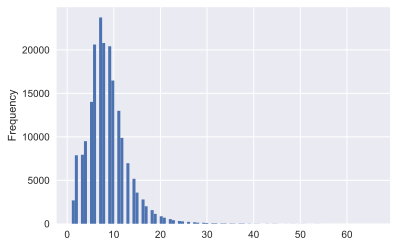

In [39]:
seq_len = df.applymap(lambda t: len(str(t).split()))

seq_len['title'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

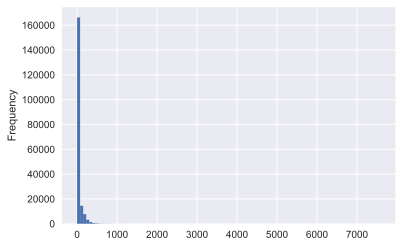

In [40]:
seq_len = df.applymap(lambda t: len(str(t).split()))

seq_len['body'].plot.hist(bins=100)

Now, we need to work with jokes without titles --> there I replace NaNs with " ".

In [42]:
# df['body'] = df['body'].fillna('')

In [43]:
# df.isna().sum()

In [41]:
df['score'] = df['score'].astype(np.int32)

### **Make new df with full joke text**

In [44]:
# df["joke"] = df["title"] + " " + df["body"]

df.rename({'title': 'joke'}, axis=1,  inplace=True) 

In [45]:
df.drop(['body'], axis=1, inplace=True)

In [46]:
df.head()

,score,joke
id,,
5tz52q,1,I hate how you cant even say black paint anymore
5tz4dd,0,What's the difference between a Jew in Nazi Ge...
5tz319,0,I recently went to America....
5tz2wj,1,"Brian raises his hand and says, “He’s in Heaven.”"
5tz1pc,0,You hear about the University book store worke...


### **Dropping duplicates**

In [47]:
df.shape

(194553, 2)

In [48]:
df.drop_duplicates(inplace=True)
df.shape

(189733, 2)

## **Cleaning**

In [49]:
text_col = 'joke'

**Lower Casing**  
Lower casing is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.  

This is more helpful for text featurization techniques like frequency, tfidf as it helps to combine the same words together thereby reducing the duplication and get correct counts / tfidf values.  

**Some other parts like:** *html removal, extra whitespaces removal are also important.*

These may not be helpful when we do tasks like Part of Speech tagging (where proper casing gives some information about Nouns and so on) and Sentiment Analysis (where upper casing refers to anger and so on)  

In [50]:
def text_preprocessing(df, col):
    
    #remove html tags
    df[col] = df[col].apply(strip_html_tags)
    print('>>> REMOVE HTML TAGS <<<')
    print(df.head(1), '\n')

    #remove extra whitespaces
    df[col] = df[col].apply(remove_whitespace)
    print('>>> REMOVE EXTRA WHITESPACES <<<')
    print(data.head(1), '\n')

    #remove accented characters
    df[col] =  df[col].apply(remove_accented_chars)
    print('>>> REMOVE ACCENTED CHARS <<<')
    print(df.head(1), '\n')

    #expand contractions
    df[col] =  df[col].apply(expand_contractions)
    print('>>> EXPAND CONTRACTIONS <<<')
    print(data.head(1), '\n')


In [51]:
text_preprocessing(df, col='joke')

>>> REMOVE HTML TAGS <<<
        score                                              joke
id                                                             
5tz52q      1  I hate how you cant even say black paint anymore 

>>> REMOVE EXTRA WHITESPACES <<<
                                                     body  score  \
id                                                                 
5tz52q  Now I have to say "Leroy can you please paint ...    1.0   

                                                   title  
id                                                        
5tz52q  I hate how you cant even say black paint anymore   

>>> REMOVE ACCENTED CHARS <<<
        score                                              joke
id                                                             
5tz52q      1  I hate how you cant even say black paint anymore 

>>> EXPAND CONTRACTIONS <<<
                                                     body  score  \
id                                          

**Removal of URLs**  
Next preprocessing step is to remove any URLs present in the data. Probably we might need to remove them for our further analysis.


1st of all, I check whether there are any URLs in dataset:

In [52]:
for i in df['joke']:
    url = find_urls(i)
    if url == []:
        continue
    else:
        print(url)
      

['www.curing-conjunctivitis.com']
['http://i.imgur.com/p7HBLoo.jpg']
['www.JebBush.com']
['www.google.corn']
['https://www.youtube.com/watch?v=4ddMyIsxZ-g).']
["www.conjunctivitis.com'"]
['http://www.splitz.com.br/problem']
['www.reddit.com']
['http://reddit.com/r/MensRights/']
['www.match.com']
['www.Ancestry.com?']
['http://loolzpedia.blogspot.com/2014/08/oxygen.html']
['www.optrex.co.uk...']
['https://www.youtube.com/watch?v=K4rM4oj-u3A']
['www.conjunctivitis.com']
['http://www.youtube.com/watch?v=kFHQzwNMo_Q']


In [53]:
df['joke'] = df['joke'].apply(lambda text: remove_urls(text))
df.head(1)

,score,joke
id,,
5tz52q,1,I hate how you cannot even say black paint any...


**Removal of numbers**  
* Here I delete only all the numbers that look like numbers, I will leave the written numbers for later.

In [54]:
df[text_col] = df[text_col].apply(lambda text: remove_numbers(text))
df.head(1)

,score,joke
id,,
5tz52q,1,I hate how you cannot even say black paint any...


In [55]:
print('The number of duplicated data is:',sum(df.duplicated()))

The number of duplicated data is: 387


## **Same jokes have different scores:**   
Now I take the biggest score from a joke and set this value to all duplicates, then I delete duplicates.

In [56]:
print('The number of duplicated data is:',sum(df['joke'].duplicated()))

The number of duplicated data is: 13308


In [57]:
dupls = df[df['joke'].duplicated() == True]['joke'].unique()
dupls

array(['How do you find Will Smith in the snow?',
       'I found a place where the recycling rate is %',
       'One night a man walks into a bar looking sad.....', ...,
       'The LAPD, The FBI and The CIA',
       'They used to be called "Jumpolines"',
       'What is the difference between a hippie chick and a hockey player?'],
      dtype=object)

In [58]:
dupls = df[df['joke'].duplicated() == True]['joke'].unique()

for j in dupls:
    max_score = max(set(df[df['joke'] == j]['score']))
    joke_idxs = df[df['joke'] == j].index
    df['score'][joke_idxs] = max_score
  

In [59]:
df[df['joke'] == dupls[0]]

,score,joke
id,,
5tz02h,302,How do you find Will Smith in the snow?
5tx887,302,How do you find Will Smith in the snow?
4y9tpl,302,How do you find Will Smith in the snow?
4q2xlk,302,How do you find Will Smith in the snow?
4mg1pt,302,How do you find Will Smith in the snow?
4k0na1,302,How do you find Will Smith in the snow?
49jwpo,302,How do you find Will Smith in the snow?
46rtb4,302,How do you find Will Smith in the snow?
46ld5r,302,How do you find Will Smith in the snow?


Removal of duplicates

In [60]:
df.shape

(189733, 2)

In [61]:
df.drop_duplicates(inplace=True)
df.shape

(176425, 2)

In [59]:
# df.to_csv('/content/drive/My Drive/NLP_humor/data/jokes_dataset_PREPROC_withOrigScores.csv',
#             sep=',',
#             header=True, 
#             index=True,
#             encoding='utf-8')

### **Split 'score' in 4 quantiles (make 5 classes):**

In [62]:
df['score'].quantile([0.2, 0.4, 0.6, 0.8])

0.2     0.0
0.4     1.0
0.6     5.0
0.8    27.0
Name: score, dtype: float64

In [63]:
df.groupby(pd.cut(df['score'], np.percentile(df['score'], [20, 40, 60, 80]), include_lowest=True)).mean()

,score
score,
"(-0.001, 1.0]",0.243471
"(1.0, 5.0]",3.149579
"(5.0, 27.0]",12.726746


In [64]:
def add_rank(data):
      if data == 0:
        return 0
      elif (data > 0) and( data <= 1):
        return 1 
      elif (data > 1)and (data <= 5):
        return 2
      elif (data > 5)and (data <= 27):
        return 3
      elif data > 267:
        return 4

In [65]:
df['rank'] = df['score'].apply(add_rank)

In [66]:
df['rank'].value_counts()

0.0    55151
3.0    35176
2.0    33260
1.0    17749
4.0     9114
Name: rank, dtype: int64

**Drop joke from one word:**

In [67]:
df['text_word_count'] = df['joke'].apply(lambda x: len(str(x).split()))
df.head(1)

,score,joke,rank,text_word_count
id,,,,
5tz52q,1,I hate how you cannot even say black paint any...,1.0,10


In [68]:
df[df['text_word_count'] == 1]

,score,joke,rank,text_word_count
id,,,,
5txinv,5,Jaws,2.0,1
5txbj3,37,Measurements,NaN,1
5twhrn,1,Colleagues,1.0,1
5twfqx,0,Communism.,0.0,1
5tv3wa,390,!false,4.0,1
...,...,...,...,...
1b0lni,43,"""Fourteen!""",NaN,1
1aq62u,0,Earthquake,0.0,1
1akixe,22,Anti-matter,3.0,1


In [69]:
df = df[df['text_word_count'] != 1]
df.drop(['score',	'text_word_count'], axis=1, inplace=True)

In [70]:
df.head()

,joke,rank
id,,
5tz52q,I hate how you cannot even say black paint any...,1.0
5tz4dd,What is the difference between a Jew in Nazi G...,0.0
5tz319,I recently went to America....,0.0
5tz2wj,"Brian raises his hand and says, ""He is in Heav...",1.0
5tz1pc,You hear about the University book store worke...,0.0


In [71]:
df.shape

(174259, 2)

# **Split**

Train/Test/Val

In [72]:
data_train, data_test = train_test_split(df, test_size=0.1, random_state=42)

data_train, data_val = train_test_split(data_train, test_size=0.1, random_state=42)

data_train.index = range(len(data_train))
data_val.index = range(len(data_val))

print("Train size = ", len(data_train))
print("Validation size = ", len(data_val))
print("Test size = ", len(data_test))

Train size =  141149
Validation size =  15684
Test size =  17426


# Save just TITLE preproc

In [74]:
data_train.to_csv(r'C:\NLP_humor\data\jokes_TRAIN_TITLE.csv',
            sep=',',
            header=True, 
            index=True,
            encoding='utf-8')

In [77]:
data_val.to_csv(r'C:\NLP_humor\data\jokes_VAL_TITLE.csv',
            sep=',',
            header=True, 
            index=True,
            encoding='utf-8')

In [78]:
data_test.to_csv(r'C:\NLP_humor\data\jokes_TEST_TITLE.csv',
            sep=',',
            header=True, 
            index=True,
            encoding='utf-8')



Just for train and val datasets. Test dataset is keeped clean.

**Concate dfs**

In [71]:
# train_val_df = pd.concat([data_train.assign(indic="train"), data_val.assign(indic="val")])

### **nlpaug**

In [79]:
!pip install nlpaug

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Users\anaconda3\python.exe -m pip install --upgrade pip' command.


In [80]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.sentence as nas
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.word.context_word_embs as nawcwe
import nlpaug.augmenter.word.word_embs as nawwe
import nlpaug.augmenter.word.spelling as naws

In [81]:
aug_syn = naw.SynonymAug(aug_src='wordnet', aug_min=1, aug_max=1)

In [82]:
def set_aug(txt):
    return aug_syn.augment(txt)

In [83]:
%%time
train_DF = data_train.copy(deep=True)

train_DF['joke_aug'] = train_DF['joke'].apply(set_aug)

Wall time: 6min


In [84]:
train_DF.drop(['joke'], axis=1, inplace=True)

In [85]:
data_train.shape

(141149, 2)

In [86]:
train_DF.shape

(141149, 2)

In [87]:
train_DF.rename({'joke_aug': 'joke'}, axis=1,  inplace=True) 

In [88]:
new_df = data_train.append(train_DF, ignore_index=True, sort=False)

In [89]:
new_df

,joke,rank
0,Jennifer Aniston's dance scenes as a stripper ...,0.0
1,How many pro choicers do you need to change a ...,0.0
2,Something went wrong .. ha ha,3.0
3,the 'winning' blonde,1.0
4,A driver was stuck in Washington D.C. in the w...,NaN
...,...,...
282293,"If you keep finding yourself going in set, rem...",2.0
282294,for all the father,0.0
282295,Non inoculate,3.0
282296,What is the about positive thing in a ghetto?,NaN


In [90]:
new_df.isna().sum()

joke        0
rank    41606
dtype: int64

### Shuffle

In [91]:
shuf_df = new_df.reindex(np.random.permutation(new_df.index)).reset_index(drop=True)

In [92]:
shuf_df

,joke,rank
0,Grub Norris,2.0
1,I do not have a small penis...,0.0
2,Why do not you ....,NaN
3,Global warming can reduce terrorism,4.0
4,What is E.T short for...,2.0
...,...,...
282293,Hey do you similar bowpha?,0.0
282294,How do you subtly fuck with people?,0.0
282295,That show the amazing race.....,2.0
282296,What do you call a weirdo slowly driving a jee...,0.0


### Drop indexes

In [93]:
data_val.reset_index(drop=True, inplace=True)
data_val.head()

,joke,rank
0,How do you know if your girlfriend is on stero...,0.0
1,TIL that when a teacher is unable to make it t...,2.0
2,Joke my friends told me.,2.0
3,Guy applies for a job as a Prison Officer,NaN
4,What do you call a mexican guy with a rubber toe?,2.0


In [94]:
data_test.reset_index(drop=True, inplace=True)
data_test.head()

,joke,rank
0,My little sister made a face at my mom and sai...,4.0
1,What do you call a poem about flour that does ...,0.0
2,"In class one day, a teacher asks her young stu...",3.0
3,A man decides to buy a lie detecting robot...,0.0
4,Lady is about to have a baby and she is yellin...,3.0


# Save preproc data:

In [95]:
shuf_df.to_csv(r'C:\NLP_humor\data\aug_jokes_TITLE_TRAIN.csv',
            sep=',',
            header=True, 
            index=False,
            encoding='utf-8')

In [96]:
data_val.to_csv(r'C:\NLP_humor\data\aug_jokes_TITLE_VAL.csv',
            sep=',',
            header=True, 
            index=False,
            encoding='utf-8')

In [97]:
data_test.to_csv(r'C:\NLP_humor\data\aug_jokes_TITLE_TEST.csv',
            sep=',',
            header=True, 
            index=False,
            encoding='utf-8')

In [100]:
shuf_df

,joke,rank
0,Grub Norris,2.0
1,I do not have a small penis...,0.0
2,Why do not you ....,NaN
3,Global warming can reduce terrorism,4.0
4,What is E.T short for...,2.0
...,...,...
282293,Hey do you similar bowpha?,0.0
282294,How do you subtly fuck with people?,0.0
282295,That show the amazing race.....,2.0
282296,What do you call a weirdo slowly driving a jee...,0.0
